1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. Reference: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Create feature and target arrays
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#### Logistic Regression Baseline, no dimensionality reduction 

In [4]:
# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

test accuracy: 0.7359307359307359
train accuracy: 0.7877094972067039


#### Apply PCA

Principle Component Analysis is a linear reduction trying to get to features that explain the most variance. It reduced the features to a number specified creating new features.  Helps reduce features that may be redundant.

Worse results with Logistic Regression

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [6]:
print(pca.explained_variance_ratio_)

[0.2711249  0.22544964 0.1193502  0.11548948]


In [7]:
# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

test accuracy: 0.5367965367965368
train accuracy: 0.7243947858472998


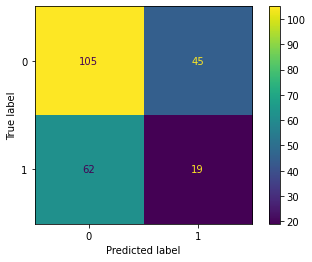

In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

#### Apply Truncated SVD

Singular Value Decomposition works best for sparse data and is a linear technique.  Can be used with one hot encoding (because that intoduces zeros).

Reducing data in this model is not necessarily producing better results.

In [9]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [10]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)

X_train=svd.fit_transform(X_train)
X_test=svd.fit_transform(X_test)

print(svd.explained_variance_ratio_)

[0.2711249  0.22544964 0.1193502  0.11548948 0.08741379 0.07930846]


In [11]:
# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

test accuracy: 0.5800865800865801
train accuracy: 0.7877094972067039


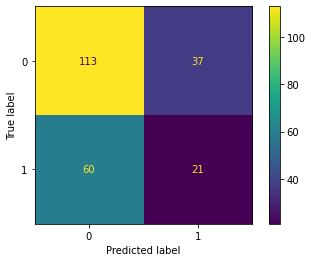

In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

### Apply Isomap

Isomap is a nonlinear reduction techinique that attempts to preserve relationships in the data.   It's like a projection of the data into fewer dimensions (features).

This did not improve performance.

In [13]:
from sklearn.manifold import Isomap
#from sklearn.datasets import load_digits

In [14]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [15]:
iso = Isomap( n_neighbors=5, n_components=3)
X_train = iso.fit_transform(X_train)
X_test = iso.fit_transform(X_test)

In [16]:
iso.dist_matrix_

array([[ 0.        ,  5.178584  ,  4.70770278, ...,  6.34474097,
         9.75064964,  2.89987572],
       [ 5.178584  ,  0.        ,  7.37436227, ...,  9.01140046,
        11.099742  ,  2.67261042],
       [ 4.70770278,  7.37436227,  0.        , ...,  3.32570965,
         8.85031348,  5.86857793],
       ...,
       [ 6.34474097,  9.01140046,  3.32570965, ...,  0.        ,
        10.03725742,  7.50850079],
       [ 9.75064964, 11.099742  ,  8.85031348, ..., 10.03725742,
         0.        , 10.30088893],
       [ 2.89987572,  2.67261042,  5.86857793, ...,  7.50850079,
        10.30088893,  0.        ]])

In [17]:
iso.dist_matrix_.shape

(231, 231)

In [18]:
# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

test accuracy: 0.6536796536796536
train accuracy: 0.6871508379888268


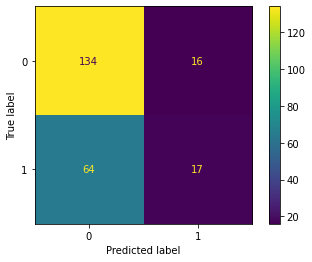

In [19]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

#### None of the dimesionality reduction techiniques improved the results from the diabetes data set.


2. Write a function that will indicate if an inputted IPv4 address is accurate or not.
IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.

In [20]:
def ipv4_check(ipv4):
    # returns boolean
    # True if string is an IPv4 address
    # False if string does not conform
    if ipv4.count('.') != 3:
        return False
    check_list = ipv4.split('.')
    for num_str in check_list:
        num = int(num_str)
        if num > 255 or num < 0:
            return False  
    return True

In [21]:
ipv4 = '255.234.89.0'

In [22]:
ipv4_check(ipv4)

True

In [23]:
ipv4_check('2.33.245.5')

True

In [24]:
ipv4_check('12.345.67.89')

False

In [25]:
# with list comprehension
def ipv4_check2(ipv4):
    if ipv4.count('.') != 3:
        return False
    check_list = [int(x) for x in ipv4.split('.')]
    for num in check_list:
        if num > 255 or num < 0:
            return False  
    return True


In [26]:
ipv4_check2('2.33.245.5')

True

In [27]:
ipv4_check2('12.345.67.89')

False